In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data = data.rename(columns={'Life expectancy at birth (years)':'Life expectancy'})

In [54]:
def dispersion(data, var1, var2, var3=None): 
    plt.style.use('seaborn-dark')
    figure, ax = plt.subplots(figsize=(12,6))
    titulo = var1 + ' vs. ' + var2
    ax.set_title(titulo)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    if var3  == None:
        ax = sns.scatterplot(data=data, x=var1, y=var2, palette='muted')
        resultados = st.linregress(data[var1], data[var2])
        slope  = resultados.slope
        intercept  = resultados.intercept
        x=np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],1000)
        y = x*slope+intercept
        ax.plot(x,y)
    elif var3:
        constantes = pd.DataFrame(columns=['Country','Slope', 'Intercept', 'Correlation'])
        i = 1
        colores = sns.color_palette('muted')
        figure.suptitle((var1 + ' vs. ' + var2),size=21, y=1.05)
        for valor in data[var3].unique():
            ax = plt.subplot(2,3,i)
            separar(data, var3)
            data=globals()[valor]
            ax = sns.scatterplot(data=data, x=var1, y=var2, color=colores[i-1],legend=False)
            ax.set_title(valor)
            x=np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],1000)
            resultados = st.linregress(data[var1], data[var2])
            slope  = resultados.slope
            intercept  = resultados.intercept
            r,p = st.pearsonr(data[var1], data[var2])
            constantes = constantes.append({'Country':valor, 'Slope':slope, 'Intercept':intercept, 'Correlation':r}, ignore_index=True)
            y = x*slope+intercept
            ax.plot(x,y, alpha=0.3, color=colores[i-1])
            i += 1
        plt.tight_layout()
        return constantes, figure    
    return figure
    
    plt.show()

In [21]:
def serie(data, var1, var2, var3=None):
    plt.style.use('seaborn-dark')
    figure, ax = plt.subplots(figsize=(8,6))
    titulo = var2
    ax.set_title(titulo,size=20)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    if var3== None:
        ax = sns.lineplot(data=data, x=var1, y=var2, palette='muted')
        ax = sns.scatterplot(data=data, x=var1, y=var2, palette='muted',legend=False)
    else: 
        ax = sns.lineplot(data=data, x=var1, y=var2, hue=var3, palette='muted')
        ax = sns.scatterplot(data=data, x=var1, y=var2, hue=var3, palette='muted', legend=False)
    return figure
    plt.show()

In [6]:
def separar(data, variable):
    resultados = []
    for valor in data[variable].unique():
        resultado = data[data[variable]==valor]
        if type(valor)==str:
            globals()[valor] = resultado
        else: 
            globals()[variable+'_'+str(valor)] = resultado

In [7]:
separar(data, 'Year')
separar(data, 'Country')

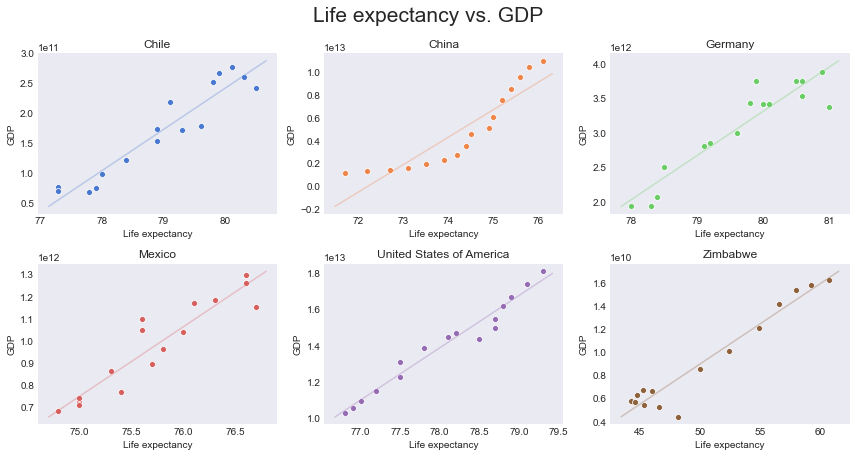

In [55]:
constantes, correlaciones = dispersion(data, 'Life expectancy', 'GDP', 'Country')

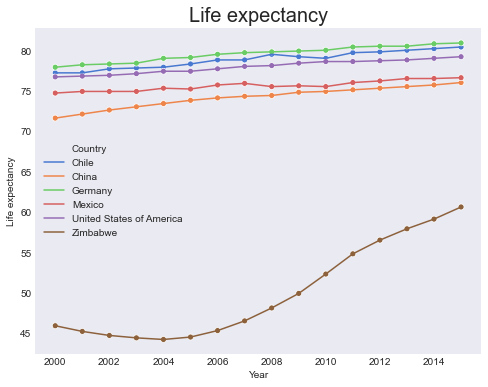

In [25]:
serie1 = serie(data, 'Year', 'Life expectancy','Country')

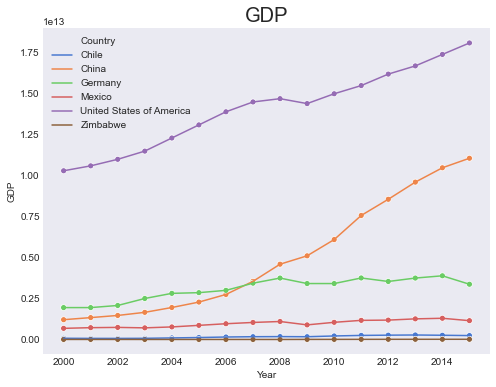

In [26]:
serie2 = serie(data, 'Year', 'GDP', 'Country' )

In [29]:
correlaciones.savefig('correlaciones.jpg')
serie1.savefig('serie1.jpg')
serie2.savefig('serie2.jpg')

In [60]:
data[data.Country == 'Zimbabwe']

,Country,Year,Life expectancy,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09
